# TP M1 Traitement du Son et de la Musique : Quantification





In [1]:
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile
!wget https://raw.githubusercontent.com/R6500/Python-bits/master/Modules/calc.py
import calc

# Erase output after import
from IPython.display import clear_output
clear_output()


# Synthèse d'une sinusoïde


In [22]:
# Sound synthesis
amplitude = 1
samplerate = 44100 # Hz
duration = 1 # second
freq = 440.0 # Hz
phi0 = 0

n = np.arange(0,duration*samplerate) # sample
t = n/samplerate #second

data = np.sin(2*np.pi*440.0*t + phi0) * amplitude


# Exercice : Bruit de quantification (Nbits = 8)



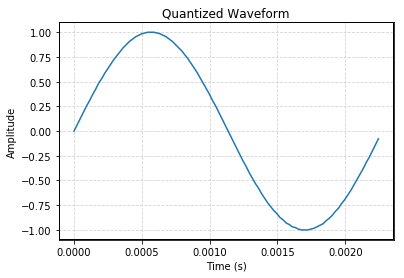

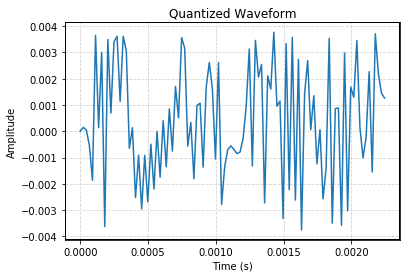

In [38]:
Nbits = 8

def quantification(data, nBits):
        paliers = 2**(nBits-1)
        quantified = data * paliers
        quantified = np.round(quantified)
        quantified = quantified/paliers
        return quantified

# signal quantifié


quantified = quantification(data, Nbits)
#TODO

# calcul et affichage snr bruit
noise = data-quantified

#TODO

#Affichage signal quantifié
# Affichage portion de signal de bruit de quantification
calc.setColaboratory(True)
# plot waveform
calc.plot11(t[0:100],quantified[0:100],"Quantized Waveform","Time (s)","Amplitude")




# Affichage portion de signal de bruit de quantification
calc.setColaboratory(True)
# plot waveform
calc.plot11(t[0:100],noise[0:100],"Quantized Waveform","Time (s)","Amplitude")




# Exercice : Bruit de quantification (Nbits = 8, 9, ..., 16)

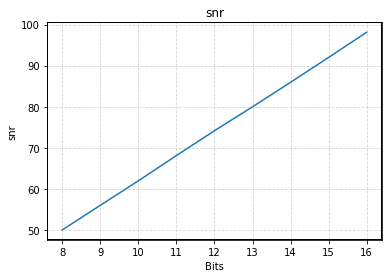

In [43]:
bits=[8, 9, 10, 11, 12, 13, 14, 15, 16]
snr=[0]*9

# Calcul du snr pour différents niombre de bits de quantification
for i in range(9):
    signal = quantification(data, i+8)
    noise = data - signal
    Esignal = np.sqrt(np.sum(signal**2))
    Ebruit = np.sqrt(np.sum(noise**2))
    snr[i] = 20*np.log10(Esignal/Ebruit)

# Affichage de la courbe du snr an fonction de nbre de bits
calc.setColaboratory(True)
# plot waveform
calc.plot11(bits, snr,"snr","Bits","snr")



#TODO

# Exercice : Quantification d'un fichier wav

In [54]:
# importing music/sound
!wget https://dept-info.labri.fr/~hanna/TSM/Sons/toms.wav

--2023-01-16 14:48:02--  https://dept-info.labri.fr/~hanna/TSM/Sons/toms.wav
Résolution de dept-info.labri.fr (dept-info.labri.fr)… 2001:660:6101:404::2:80, 147.210.9.83
Connexion à dept-info.labri.fr (dept-info.labri.fr)|2001:660:6101:404::2:80|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 836044 (816K) [audio/x-wav]
Sauvegarde en : « toms.wav.1 »

toms.wav.1          100%[===================>] 816,45K  --.-KB/s    ds 0,01s   

2023-01-16 14:48:02 (67,0 MB/s) — « toms.wav.1 » sauvegardé [836044/836044]



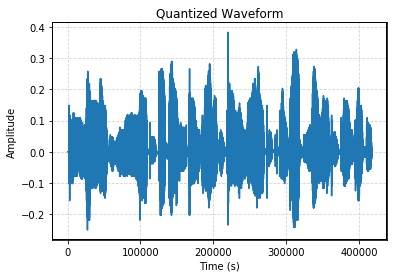

In [77]:
Nbits = 8

# Load the file on an object
data = wavfile.read('toms.wav')
samplerate=data[0]
sound=data[1]
sound = sound/2**15
# quantification
quantif = sound*(2**(Nbits-1))
quantif = np.round(quantif)
quantif = quantif/(2**(Nbits-1))

# affichage d'une portion
calc.setColaboratory(True)

# plot waveforms
calc.plot11(np.arange(0,len(quantif)),quantif,"Quantized Waveform","Time (s)","Amplitude")

# Listening 
Audio(quantif,rate=samplerate)

# Exercice : Quantification log


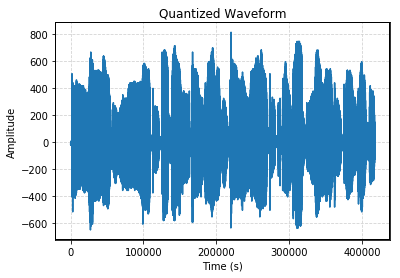

In [92]:
Nbits = 8
mu = 255
import math
sign = lambda x: math.copysign(1, x)

# Load the file on an object
data = wavfile.read('toms.wav')
samplerate=data[0]
sound=data[1]
sound = sound/2**15
# quantification

compressed = sound
#TODO
# compression
for i in range(len(sound)):
    compressed[i] = sign(sound[i])*((np.log10(1+mu*np.abs(sound[i])))/np.log10(1+mu))


# quantification
quantified = quantification(compressed, Nbits)



# expansion
expended = quantified
for i in range(len(sound)):
    expended[i] = sign(quantified[i])*((np.exp(np.abs(quantified[i])*np.log10(1+mu))-1)/mu)
expended = expended*2**15

    
calc.setColaboratory(True)
# plot waveform
calc.plot11(np.arange(0,len(expended)),expended,"Quantized Waveform","Time (s)","Amplitude")

#Listening
#TODO
Audio(expended,rate=samplerate)

# Conclusion about quality : 8bits log or 8bits linear ?
